In [31]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

In [32]:
data = ascii.read('Data/UID_0043587_RVC_008.tbl.txt')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


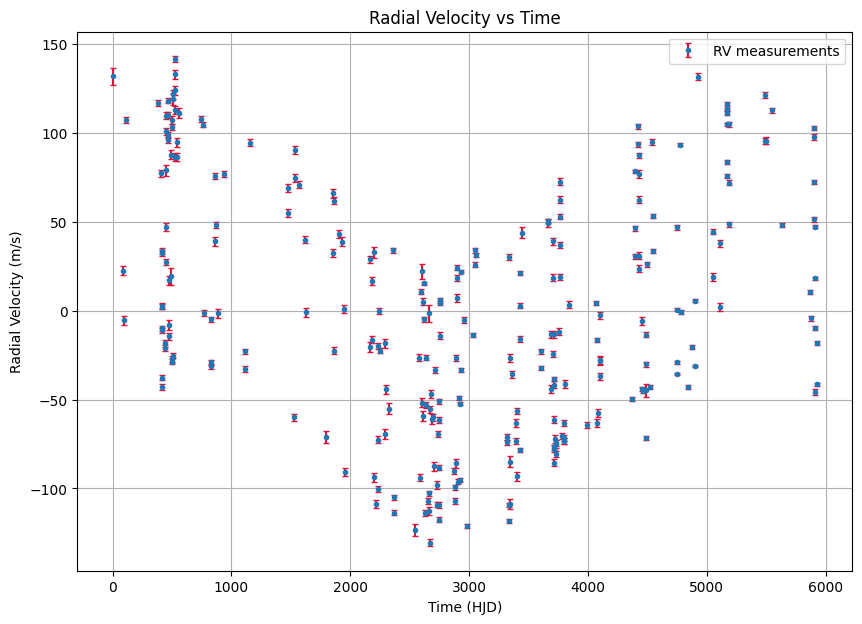

In [33]:
hjd = data['HJD']
radial_velocity = data['Radial_Velocity']
uncertainty = data['Radial_Velocity_Uncertainty']

# Change time reference to first datapoint to reduce large HJD
scaled_hjd = hjd - hjd[0]

plt.figure(figsize=(10, 7))

plt.errorbar(scaled_hjd, radial_velocity, yerr=uncertainty, fmt='o', ecolor='crimson', capsize=2, markersize=3, label='RV measurements')

plt.xlabel("Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Radial Velocity vs Time")
plt.legend()
plt.grid()
plt.savefig("rv_data_plot.pdf")
plt.show()

# Fit the oscillatory function to the data

In [34]:
# Define oscillatory model: amplitude, phase shift, period, vertical offset

def f_curve(x,amplitude,start,period,offset):
    return amplitude * np.sin(2.0 * np.pi * (x-start)/period ) + offset

initial_guess = [60, 1000, 5000, 0]
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity,
                                        sigma=uncertainty, absolute_sigma=True,
                                        p0=initial_guess)
K1, phi1, P1, offset1 = params

# Ensure positive amplitude
if K1 < 0:
    K1 *= -1
    phi1 += P1 / 2

print(f"Best fit: K1 = {K1:.2f} m/s, P1 = {P1:.2f} d, phi1 = {phi1:.2f} d, offset1 = {offset1:.2f} m/s")

Best fit: K1 = 47.92 m/s, P1 = 4806.92 d, phi1 = 4221.92 d, offset1 = -1.42 m/s


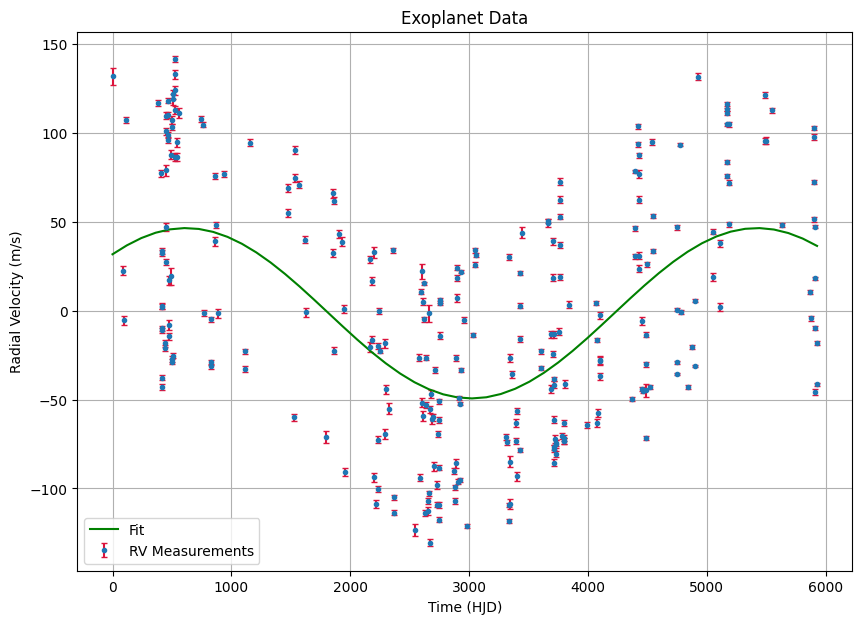

In [35]:
# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)))
y_fit = f_curve(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...'

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, markersize=3, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Exoplanet Data")
plt.xlabel(f"Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.legend()
plt.grid()
plt.savefig("planet1_fit.pdf")
plt.show()